In [67]:
import pandas as pd
from utils import make_plot, rmse  

In [68]:
# log_file_path = 'optim_wardi_test.log'
# log_file_path = 'regular_wardi_test.log'
log_file_path = 'loggyy2.log'

# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,pred_time,nr_time,ctrl_callback_time,metadata
0,0.000001,0.012044,-0.014589,-0.013635,0.021567,0.757261,0.028415,-0.004697,-0.008087,0.0,0.0,-10.0,0.0,0.370162,0.370162,0.433691,Sim
1,0.433781,0.012044,-0.014589,-0.013635,0.021567,0.805032,0.018879,-0.003016,-0.013749,0.0,0.0,-10.0,0.0,0.000790,0.000790,0.003659,jax_reg_wardi
2,0.439522,0.009750,-0.014874,-0.017404,0.021781,0.841504,0.020793,-0.005875,-0.017792,0.0,0.0,-10.0,0.0,0.000771,0.000771,0.003412,1x Speed
3,0.449388,0.009656,-0.014861,-0.017445,0.021790,0.869695,0.020645,-0.005852,-0.020626,0.0,0.0,-10.0,0.0,0.000924,0.000924,0.003977,QuatYawError
4,0.459645,0.009564,-0.014849,-0.017484,0.021792,0.891671,0.020471,-0.005849,-0.022610,0.0,0.0,-10.0,0.0,0.000912,0.000912,0.003727,0


In [69]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"Predictor was: {df_log['metadata'][1]}")
print(f"Speed: {df_log['metadata'][2]}")
print(f"(Valid for Nonlin & Jax predictor only) Predictor was: {df_log['metadata'][3]}")
print(f"For yaw error we used: {df_log['metadata'][4]}")
print(f"{df_log['metadata'][5]}")
print(f"Mean NR computation time: {df_log['nr_time'].mean()}")
print(f"Mean NR computation freq: {1/df_log['nr_time'].mean()}")
print(f"Mean callback time: {df_log['ctrl_callback_time'].mean()}")
print(f"RMSE: {rmse(df_log)}")


This data comes from: Sim
Predictor was: jax_reg_wardi
Speed: 1x Speed
(Valid for Nonlin & Jax predictor only) Predictor was: QuatYawError
For yaw error we used: 0
0
Mean NR computation time: 0.0013459759436944762
Mean NR computation freq: 742.9553289453073
Mean callback time: 0.004334623934306083
RMSE: 2.4847712281806404


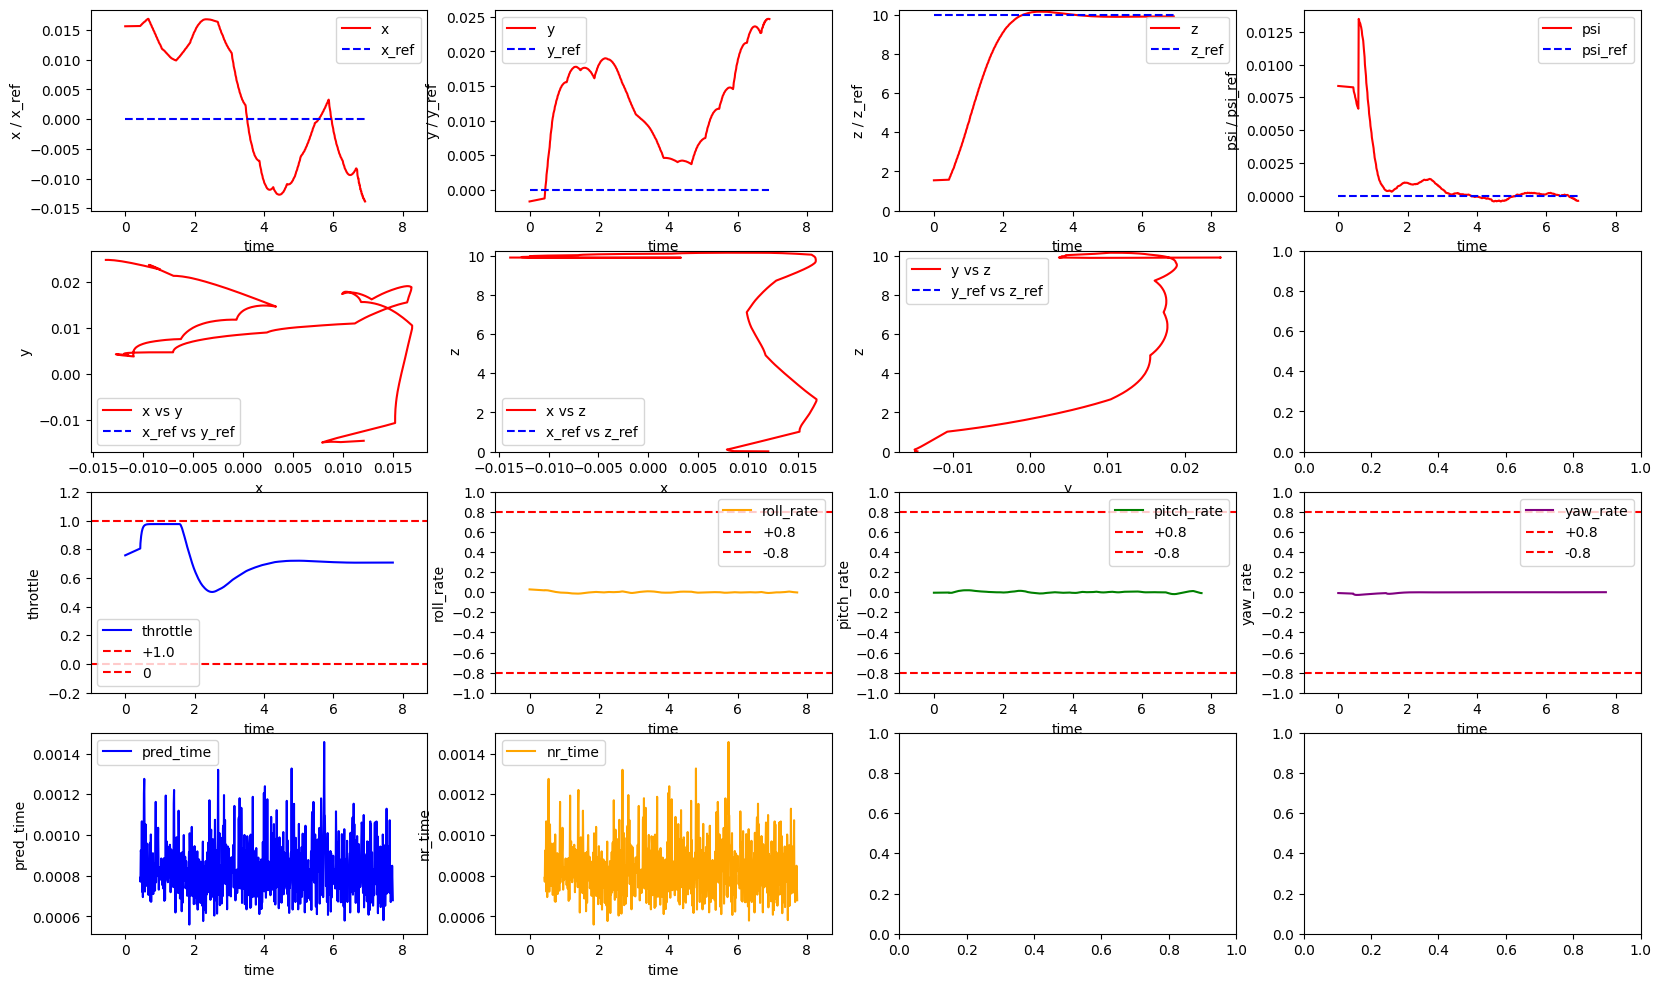

In [70]:
# Reuse the plotting function defined earlier for the uploaded .log data
make_plot(df_log)